# Installing Packages


In [ ]:
!pip install nsepy
!pip install pandas_ta
!pip install yfinance
!pip install googlefinance

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=874cd99cfea65b7a83ae77a39a9cfe5acc1d86ca12b6ebcf804ffabe5d4f5065
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy
     |████████████████████████████████| 115 kB 5.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=32a2a28d50dd54ffb49fa05345ae9d5799154e71074376e231027d0109561ed8
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxm

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import pandas_ta as ta
import googlefinance as gf
import yfinance as yf
import nsepy as ns

In [ ]:
!pip install vectorbt
!pip install quantstats

     |████████████████████████████████| 488 kB 5.2 MB/s 
     |████████████████████████████████| 288 kB 60.2 MB/s 
     |████████████████████████████████| 3.4 MB 38.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
  Created wheel for vectorbt: filename=vectorbt-0.23.1-py3-none-any.whl size=531003 sha256=1f8f42c2806d275417a873eb534aa77f40c776ce18090e1e1ef22354b5aebea0
  Stored in directory: /root/.cache/pip/wheels/40/10/54/cd5d086a14e5cfa487bfbfe21370911028126e27153f803ea8
Successfully built vectorbt
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


     |████████████████████████████████| 40 kB 2.8 MB/s 


In [ ]:
import vectorbt as vbt
import datetime
import quantstats as qs
from numba import njit

# Download Stock Trade Data using YFinance

In [ ]:
df_infy_d = yf.download("INFY.NS", start = "2012-06-02", end = "2020-06-07", interval = "1wk")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_nifty_d = yf.download("^NSEI", start = "2004-01-01", end = "2021-12-28", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_all_d = yf.download("INFY.NS ^NSEI", start = "2020-06-02", end ="2020-06-07", interval = "60m")

[*********************100%***********************]  2 of 2 completed


In [ ]:
df_infy_d.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-04,296.750000,311.112488,293.125000,302.406250,241.310608,31793904.0
2012-06-11,303.375000,316.500000,300.274994,315.318756,251.614365,28041096.0
2012-06-18,316.875000,318.043762,303.306244,309.306244,246.816574,33018032.0
2012-06-25,309.362488,314.875000,303.693756,313.649994,250.282761,43934936.0
2012-07-02,312.875000,314.850006,305.000000,305.581238,243.844101,28662744.0


In [ ]:
df_all_d.head()

Adj Close               ...   Volume      
                              INFY.NS        ^NSEI  ...  INFY.NS ^NSEI
Datetime                                            ...               
2020-06-02 09:15:00+05:30  700.849976  9871.750000  ...        0     0
2020-06-02 10:15:00+05:30  705.799988  9893.599609  ...  1444916     0
2020-06-02 11:15:00+05:30  708.000000  9920.549805  ...  2665104     0
2020-06-02 12:15:00+05:30  707.500000  9955.400391  ...  2180897     0
2020-06-02 13:15:00+05:30  708.599976  9964.200195  ...  2438502     0

[5 rows x 12 columns]

In [ ]:
df_nifty_d.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [ ]:
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, timeout=None, **kwargs)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' o

# Saving Data

In [ ]:
df_infy_d.to_csv("infy_daily.csv")

In [ ]:
files.download("infy_daily.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
infosys = yf.Ticker("infy.ns")
infosys

yfinance.Ticker object <INFY.NS>

In [ ]:
infosys.balancesheet

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Intangible Assets,2.830000e+08,2.510000e+08,1.000000e+08,3.800000e+07
Capital Surplus,3.590000e+08,3.050000e+08,2.770000e+08,2.470000e+08
Total Liab,4.323000e+09,3.559000e+09,2.852000e+09,2.295000e+09
Total Stockholder Equity,1.044200e+10,8.646000e+09,9.391000e+09,9.960000e+09
Minority Interest,6.000000e+07,5.500000e+07,9.000000e+06,1.000000e+07
Deferred Long Term Liab,2.000000e+07,1.300000e+07,4.000000e+07,4.000000e+07
Other Current Liab,1.362000e+09,1.138000e+09,1.368000e+09,1.078000e+09
Total Assets,1.482500e+10,1.226000e+10,1.225200e+10,1.225500e+10
Common Stock,3.320000e+08,3.320000e+08,3.390000e+08,1.900000e+08
Other Current Assets,6.530000e+08,5.060000e+08,5.850000e+08,7.360000e+08


In [ ]:
apple = yf.Ticker("aapl")
apple

yfinance.Ticker object <AAPL>

In [ ]:
apple.get_analysis()

,Max Age,End Date,Growth,Earnings Estimate Avg,Earnings Estimate Low,Earnings Estimate High,Earnings Estimate Year Ago Eps,Earnings Estimate Number Of Analysts,Earnings Estimate Growth,Revenue Estimate Avg,Revenue Estimate Low,Revenue Estimate High,Revenue Estimate Number Of Analysts,Revenue Estimate Year Ago Revenue,Revenue Estimate Growth,Eps Trend Current,Eps Trend 7Days Ago,Eps Trend 30Days Ago,Eps Trend 60Days Ago,Eps Trend 90Days Ago,Eps Revisions Up Last7Days,Eps Revisions Up Last30Days,Eps Revisions Down Last30Days,Eps Revisions Down Last90Days
Period,,,,,,,,,,,,,,,,,,,,,,,,
0Q,1,2022-03-31,-0.05000,1.33,1.16,1.51,1.40,26.0,-0.050,9.086580e+10,8.487470e+10,9.828400e+10,23.0,NaN,NaN,1.33,1.33,1.32,1.32,1.29,3.0,8.0,1.0,NaN
+1Q,1,2022-06-30,-0.09200,1.18,0.98,1.40,1.30,26.0,-0.092,8.351230e+10,7.526940e+10,9.464200e+10,23.0,NaN,NaN,1.18,1.18,1.18,1.18,1.18,1.0,3.0,3.0,NaN
0Y,1,2022-09-30,0.02500,5.75,5.20,6.27,5.61,40.0,0.025,3.830370e+11,3.591560e+11,4.054350e+11,38.0,3.658170e+11,0.047,5.75,5.74,5.74,5.74,5.68,3.0,6.0,3.0,NaN
+1Y,1,2023-09-30,0.07800,6.20,5.26,6.82,5.75,36.0,0.078,4.028970e+11,3.005000e+11,4.455840e+11,34.0,3.830370e+11,0.052,6.20,6.19,6.18,6.15,5.98,3.0,5.0,2.0,NaN
+5Y,1,NaT,0.14360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5Y,1,NaT,0.08415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
apple.get_info()

{'52WeekChange': 0.2697928,
 'SandP52WeekChange': 0.17435467,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 1400,
 'averageDailyVolume10Day': 116300610,
 'averageVolume': 98747687,
 'averageVolume10days': 116300610,
 'beta': 1.202736,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 900,
 'bookValue': 4.402,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 170.33,
 'currentRatio': 1.038,
 'dateShortInterest': 1642118400,
 'dayHigh': 170.35,
 'dayLow': 162.8,
 'debtToEquity': 170.714,
 'dividendRate': 0.88,
 'dividendYield': 0.0052,
 'earningsGrowth': 0.25,
 'earningsQuarterlyGrowth': 0.204,
 'ebitda': 128217997312,
 'ebitdaMargins': 0.33890998,
 'enterpriseToEbitda': 22.139,
 'enterpriseToRevenue': 7.503,
 'enterpriseValue': 2838575448064,
 'exDividendDate': 1643932800,
 'exchange': 'N

# Generating Visualisation for Infosys & NSEI


In [ ]:
stock = qs.utils.download_returns("INFY.NS")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


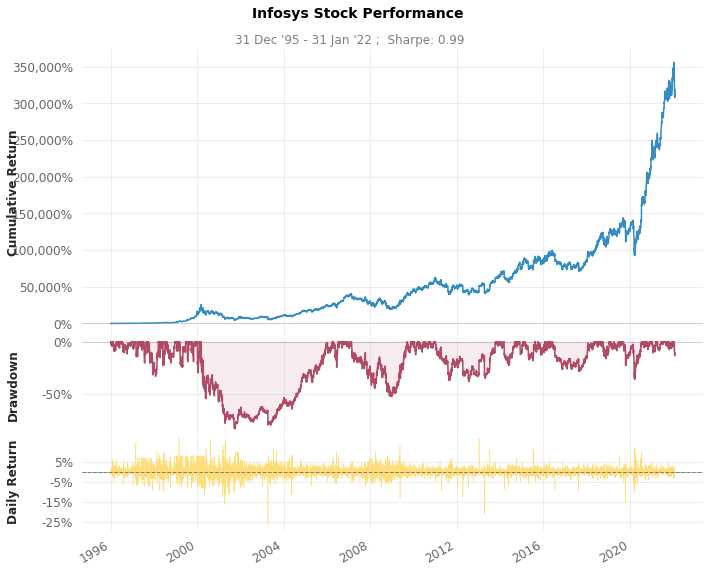

In [ ]:
qs.plots.snapshot(stock, title = "Infosys Stock Performance")

[Performance Metrics]



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


                           Strategy
-------------------------  -----------
Start Period               1996-01-01
End Period                 2022-01-31
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          318,670.33%
CAGR﹪                     36.22%

Sharpe                     0.99
Smart Sharpe               0.93
Sortino                    1.49
Smart Sortino              1.4
Sortino/√2                 1.05
Smart Sortino/√2           0.99
Omega                      1.21

Max Drawdown               -83.0%
Longest DD Days            2217
Volatility (ann.)          38.94%
Calmar                     0.44
Skew                       -0.03
Kurtosis                   8.07

Expected Daily %           0.12%
Expected Monthly %         2.61%
Expected Yearly %          34.82%
Kelly Criterion            8.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.88%
Expected Shortfall (cVaR)  -3.88%

Gain/Pain Ratio            0.21
Gain/Pain (1M)        

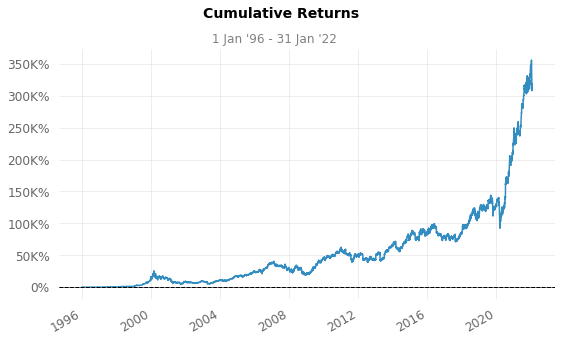

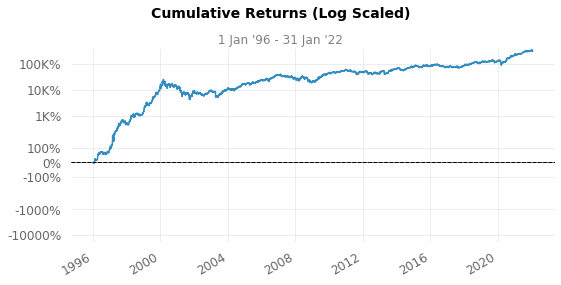

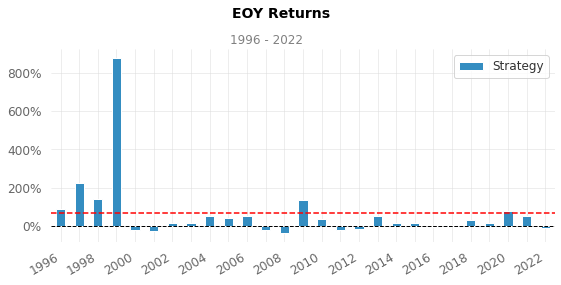

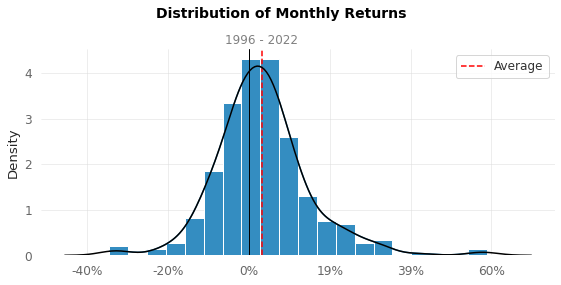

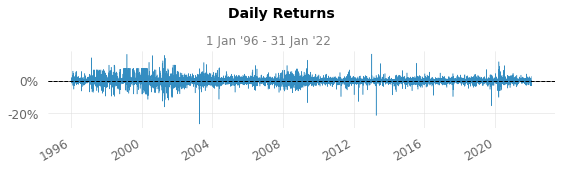

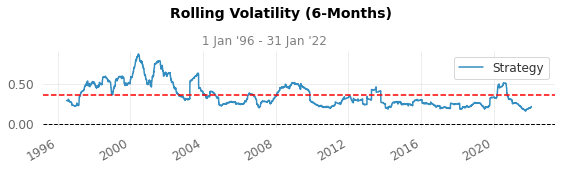

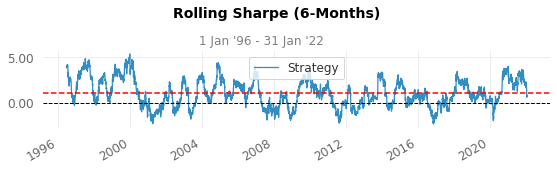

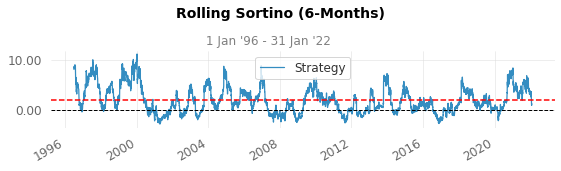

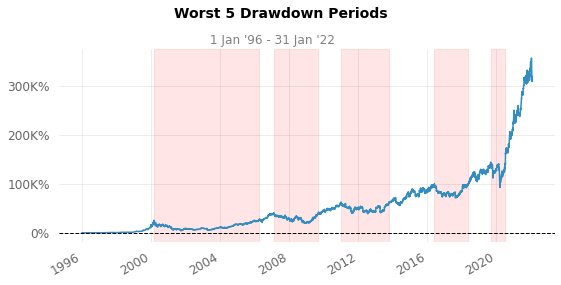

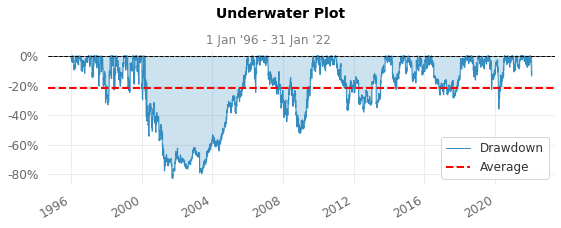

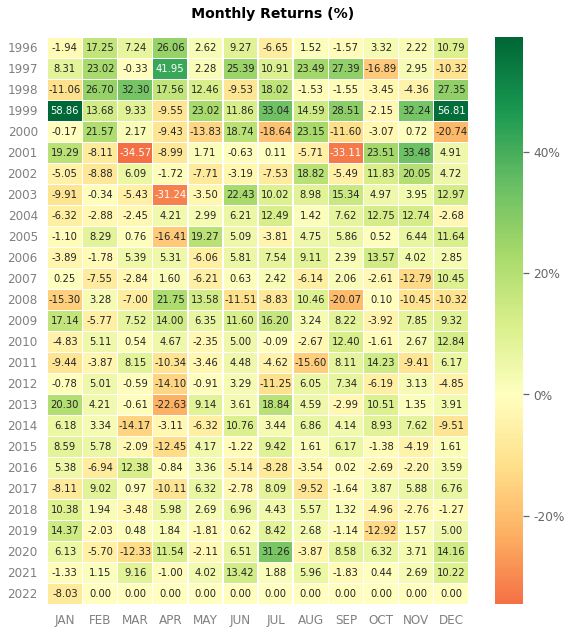

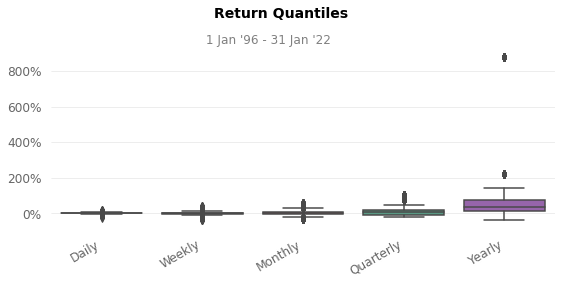

In [ ]:
qs.reports.full(stock, display = True)

In [ ]:
nse = qs.utils.download_returns("NIFTY.NS")

- NIFTY.NS: No data found, symbol may be delisted


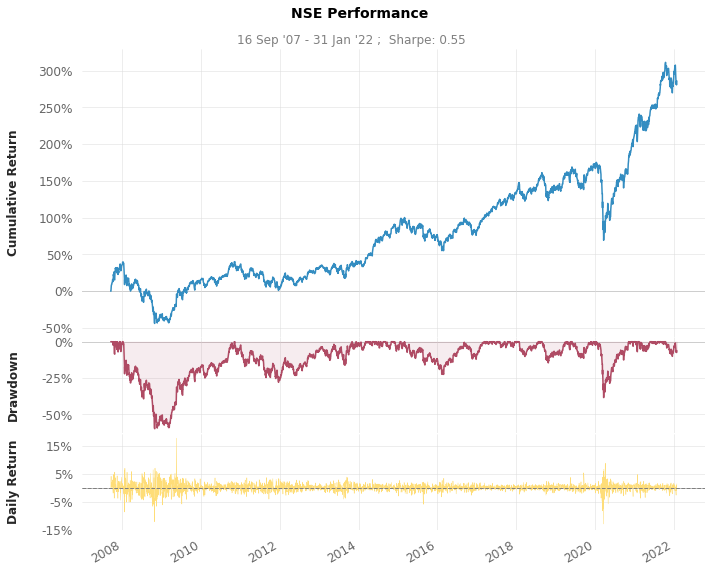

In [ ]:
qs.plots.snapshot(nse, title = "NSE Performance")

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2007-09-17
End Period                 2022-01-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          285.79%
CAGR﹪                     9.84%

Sharpe                     0.55
Smart Sharpe               0.52
Sortino                    0.78
Smart Sortino              0.75
Sortino/√2                 0.55
Smart Sortino/√2           0.53
Omega                      1.11

Max Drawdown               -59.86%
Longest DD Days            1087
Volatility (ann.)          22.3%
Calmar                     0.16
Skew                       0.08
Kurtosis                   14.77

Expected Daily %           0.04%
Expected Monthly %         0.78%
Expected Yearly %          8.8%
Kelly Criterion            5.24%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.26%
Expected Shortfall (cVaR)  -2.26%

Gain/Pain Ratio            0.11
Gain/

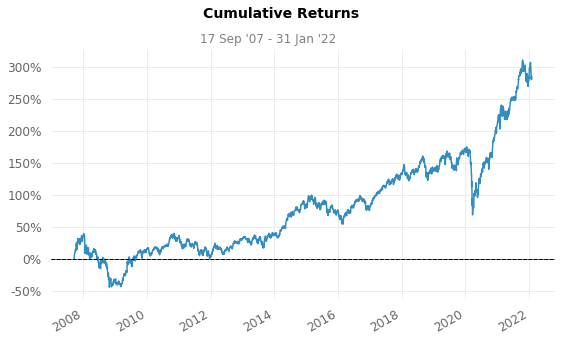

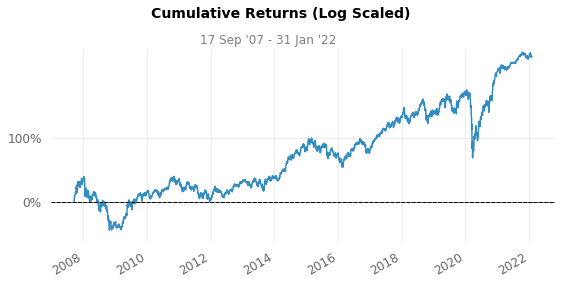

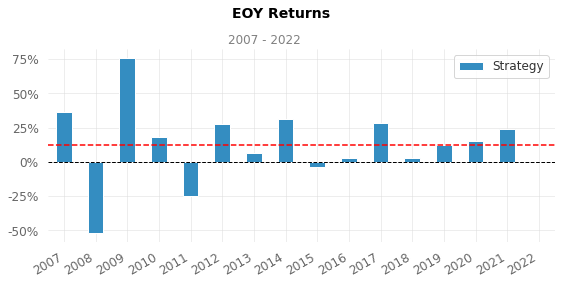

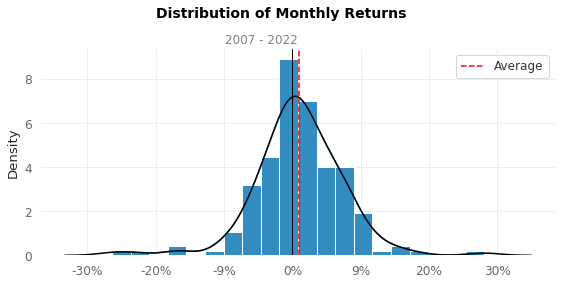

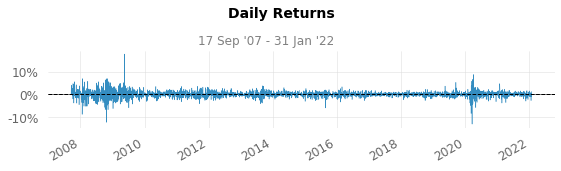

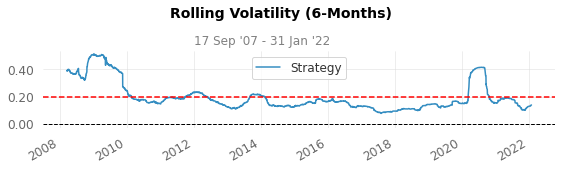

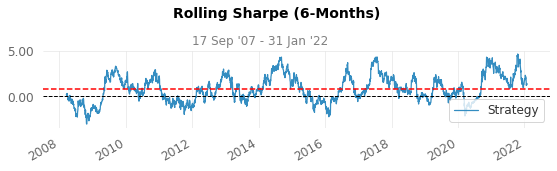

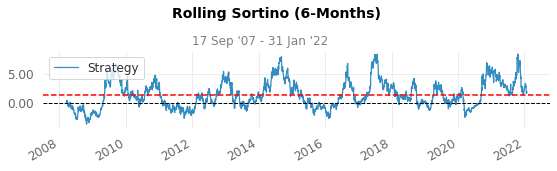

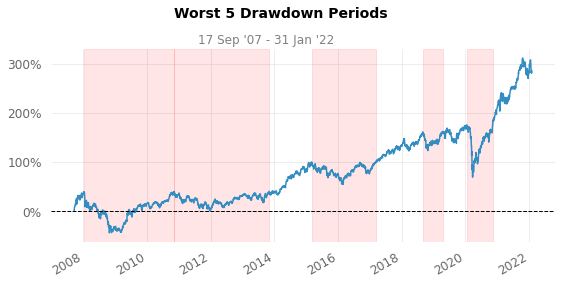

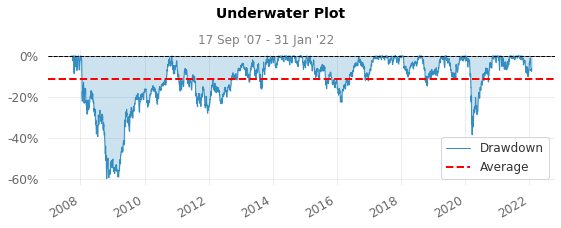

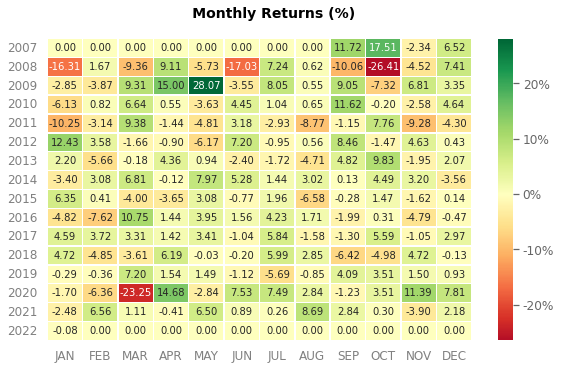

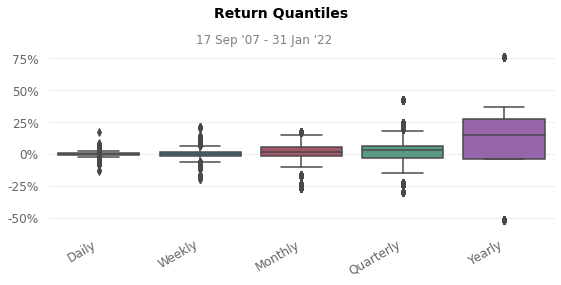

In [ ]:
qs.reports.full(nse, display = True)